In [1]:
import itertools
from sunpy.net import Fido, attrs as a
from sunpy.timeseries import TimeSeries
from sunpy.time import parse_time
from astropy.io import fits
import matplotlib.pyplot as plt

c:\Users\James\Documents\Coding\sff_experimentation\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
flare_spe = ['2013-11-09 06:22', '2013-11-09 06:38', '2013-11-09 06:47']
flare_start = flare_spe[0]
flare_peak =flare_spe[1] 
flare_end = flare_spe[2]

pre_flare = '2013-11-09 06:15'
post_flare = '2013-11-09 07:10'


In [3]:
a.Instrument

Attribute Name,Client,Full Name,Description
aia,VSO,AIA,Atmospheric Imaging Assembly
bcs,VSO,BCS,Bragg Crystal Spectrometer
be_continuum,VSO,BE-Continuum,INAF-OACT Barra Equatoriale Continuum Instrument
be_halpha,VSO,BE-Halpha,INAF-OACT Barra Equatoriale Hα Instrument
bigbear,VSO,Big Bear,"Big Bear Solar Observatory, California TON and GONG+ sites"
caii,VSO,CAII,Kanzelhöhe Ca II k Instrument
cds,VSO,CDS,Coronal Diagnostic Spectrometer
celias,VSO,CELIAS,"Charge, Element, and Isotope Analysis System"
cerrotololo,VSO,Cerro Tololo,"Cerro Tololo, Chile GONG+ site"
chp,VSO,chp,Chromospheric Helium-I Imaging Photometer


In [4]:
########
# GOES #
########

goes_fido_result = Fido.search(
    a.Time(flare_start, flare_end),
    a.Instrument.goes
)

##########
# RHESSI #
##########

rhessi_fido_result = Fido.search(
    a.Time(flare_start, flare_end),
    a.Instrument.rhessi
)

tr = a.Time(pre_flare, post_flare)

results = Fido.search(
    tr,
    (
        a.Instrument.xrs &
        a.goes.SatelliteNumber(15) &
        a.Resolution("avg1m") |
        a.hek.FL &
        (a.hek.FRM.Name == 'SWPC')
    )
)  # NOQA

#########
# FERMI #
#########

fermi_fido_result = Fido.search(
    a.Time(flare_start, flare_end),
    a.Instrument.gbm,
    a.Detector.n4
)

#######
# EVE #
#######

eve_fido_result = Fido.search(
    a.Time(flare_start, flare_end),
    a.Instrument.eve
)

#######
# EIS #
#######

eis_fido_result = Fido.search(
    a.Time(flare_start, flare_end),
    a.Instrument.eis
)

#######
# SOT #
#######

sot_fido_result = Fido.search(
    a.Time(flare_start, flare_end),
    a.Instrument.sot
)

#######
# XRT #
#######

xrt_fido_result = Fido.search(
    a.Time(flare_start, flare_end),
    a.Instrument.xrt
)


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded: 100%|██████████| 1/1 [00:00<00:00,  1.38file/s]


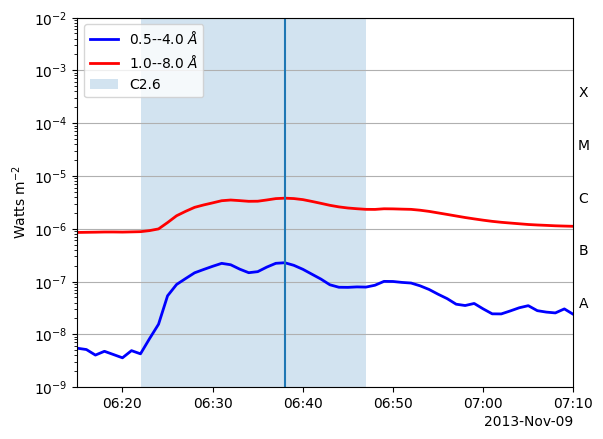

In [5]:
files = Fido.fetch(results)
goes = TimeSeries(files)

hek_results = results['hek']
flares_hek = hek_results[0]

fig, ax = plt.subplots()
goes.plot(axes=ax)
ax.axvline(parse_time(flares_hek['event_peaktime']).datetime)
ax.axvspan(
    parse_time(flares_hek['event_starttime']).datetime,
    parse_time(flares_hek['event_endtime']).datetime,
    alpha=0.2, label=flares_hek['fl_goescls']
)
ax.legend(loc=2)
ax.set_yscale('log')
ax.set_xlim(tr.start.to_datetime(), tr.end.to_datetime())

plt.show()

In [6]:
print(goes_fido_result[0,2])
print()
print(rhessi_fido_result[0,0])
print()
print(fermi_fido_result[0,0])
print()
# print(eve_fido_result[1,:])
print(eve_fido_result[1,0])
# print()
# print(eis_fido_result[0,0])
# print()
# print(sot_fido_result)
# print()
print(xrt_fido_result[0,0])

       Start Time               End Time        Instrument SatelliteNumber  Physobs                                                                                 url                                                                               Source Provider Resolution
----------------------- ----------------------- ---------- --------------- ---------- --------------------------------------------------------------------------------------------------------------------------------------------------------------- ------ -------- ----------
2013-11-09 00:00:00.000 2013-11-09 23:59:59.999       GOES              15 irradiance https://www.ncei.noaa.gov/data/goes-space-environment-monitor/access/science/xrs/goes15/gxrs-l2-irrad_science/2013/11/sci_gxrs-l2-irrad_g15_d20131109_v0-0-0.nc   GOES     NOAA      flx1s

       Start Time               End Time        Instrument      Physobs       Source Provider                                           url                                         

Files Downloaded: 100%|██████████| 1/1 [00:00<00:00,  1.38file/s]


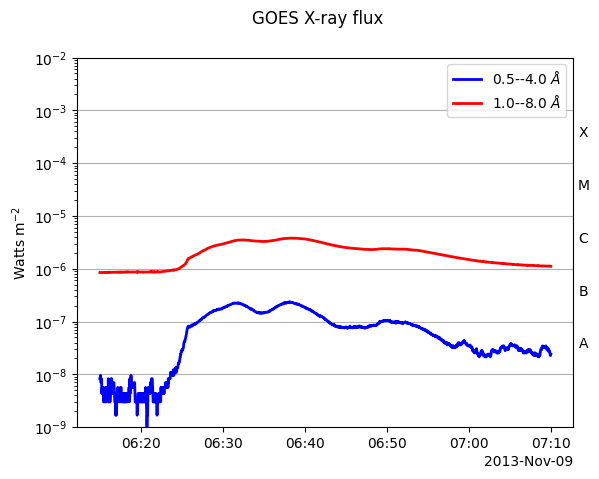

Files Downloaded: 100%|██████████| 1/1 [00:00<00:00,  2.44file/s]


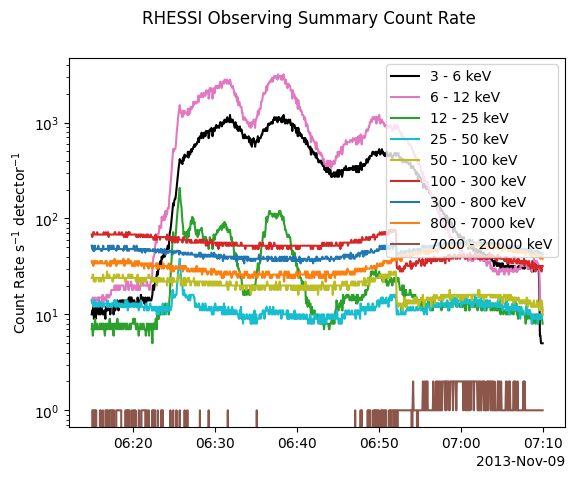

Files Downloaded: 100%|██████████| 1/1 [00:00<00:00,  2.38file/s]
c:\Users\James\Documents\Coding\sff_experimentation\venv\Lib\site-packages\sunpy\timeseries\sources\fermi_gbm.py:228: RuntimeWarning: invalid value encountered in divide
  summary_counts.append(summed_counts/energy_width/count_data["exposure"])


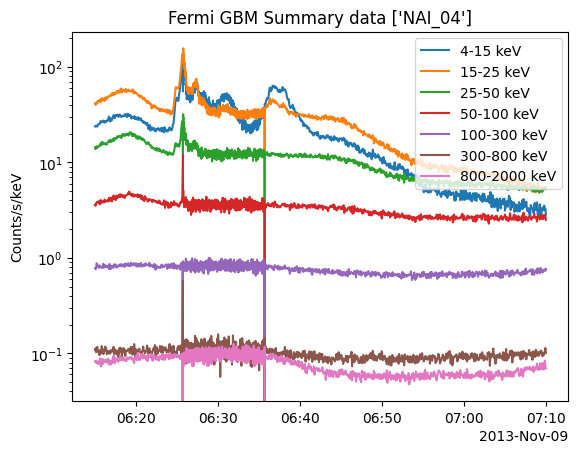

Files Downloaded: 100%|██████████| 1/1 [00:00<00:00,  1.80file/s]


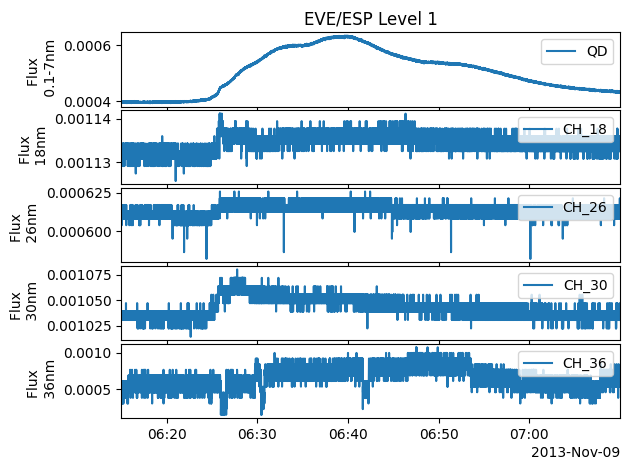

In [7]:
########
# GOES #
########

goes_files = Fido.fetch(
    goes_fido_result[0,2],
    path='light_curve_data'
) 

goes = TimeSeries(goes_files).truncate(pre_flare, post_flare)

goes.peek()

df = goes.to_dataframe()
df = df[(df["xrsa_quality"] == 0) & (df["xrsb_quality"] == 0)]
goes = TimeSeries(df, goes.meta, goes.units)

##########
# RHESSI #
##########

rhessi_files = Fido.fetch(
    rhessi_fido_result[0,0],
    path='light_curve_data'
)

rhessi = TimeSeries(rhessi_files).truncate(pre_flare, post_flare)

rhessi.peek()

#########
# FERMI #
#########

fermi_files = Fido.fetch(
    fermi_fido_result[0,0],
    path='light_curve_data'
)

fermi = TimeSeries(fermi_files).truncate(pre_flare, post_flare)

fermi.peek()

#######
# EVE #
#######

eve_files = Fido.fetch(
    eve_fido_result[1,0],
    path='light_curve_data'
)

eve = TimeSeries(eve_files).truncate(pre_flare, post_flare)

eve.peek()


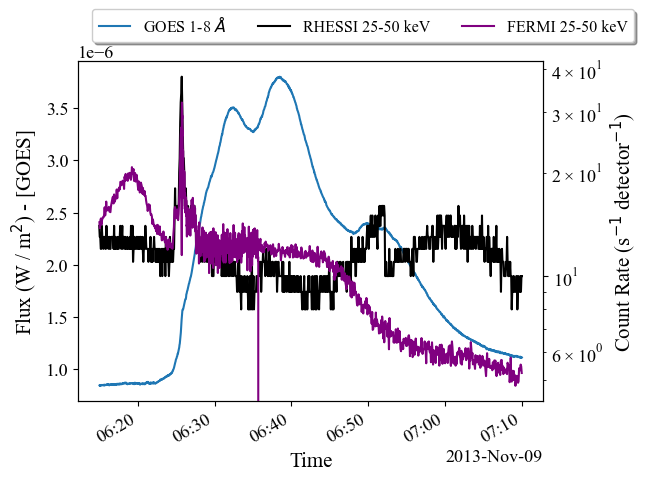

In [8]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 13})

fig, ax1 = plt.subplots(
    figsize=(6, 5)
)

########
# GOES #
########

goes.plot(
    axes=ax1,
    columns=["xrsb"]
)

##########
# RHESSI #
##########

ax2 = ax1.twinx()

rhessi.plot(
    axes=ax2, 
    columns=['25 - 50 keV']
)

#########
# FERMI #
#########

fermi.plot(
    axes=ax2,
    columns=['25-50 keV'],
    color='purple'
)

##############
# FORMATTING #
##############

ax1.legend().remove()
ax2.legend().remove()
fig.legend(
    loc='upper center',
    bbox_to_anchor=(.6, 1),
    ncol=3,
    fancybox=True,
    shadow=True,
    labels=['GOES 1-8 $\AA$', 'RHESSI 25-50 keV', 'FERMI 25-50 keV'],
    fontsize=11.5
)
ax1.set_xlabel('Time', fontsize=15)
ax1.set_ylabel('Flux (W / m$^2$) - [GOES]', fontsize=15)
ax2.set_ylabel('Count Rate (s$^{-1}$ detector$^{-1}$)', fontsize=15)

plt.show()